# Given

A prerpocessed dataset (similar to MNIST) of handwritten digits from 0 to 9, decoded in a matrix 20x20 flattened into 400 attributes.

Dataset:

| Pixel 1 | Pixel 2 | Pixel 3 | ... | Pixel 400 | Label |
|---------|---------|---------|-----|-----------|-------|
|    0    |    0    |    0    | ... |    245    |   7   |
|    0    |   110   |   255   | ... |     0     |   2   |
|    0    |    23   |   255   | ... |     0     |   1   |
|    0    |    0    |    0    | ... |     0     |   0   |
|    0    |    0    |    0    | ... |     0     |   4   |
|    0    |    3    |   222   | ... |     0     |   1   |


# Find

TensorFlow model and forecast few examples


Use these TensorFlow model parameters:
   - Activation = 2x Relu, 1x Linear 
   - Optimizator = Adam(learning_rate = 0.001)
   - Loss = SparseCategoricalCrossentropy(From logits = True)
   - 2 sigmoid layers [x25->x15->x10]
   - Epochs = 40

# Solution

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-10-24 23:02:02.283811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
x = np.load("handwritten_X.npy")
y = np.load("handwritten_y.npy")

x.shape, y.shape

((5000, 400), (5000, 1))

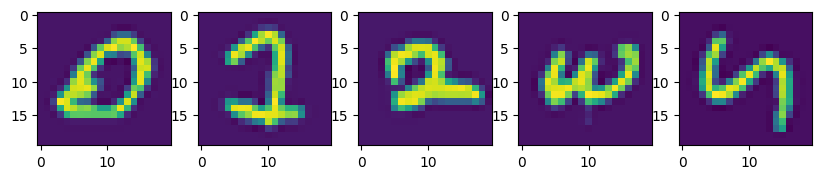

In [47]:
fig, ax = plt.subplots(1, 5, figsize=(10,2))
ax[0].imshow(x[1].reshape(20,20))
ax[1].imshow(x[2006].reshape(20,20))
ax[2].imshow(x[4610].reshape(20,20))
ax[3].imshow(x[1711].reshape(20,20))
ax[4].imshow(x[1004].reshape(20,20))

Tensorflow model

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, activation="relu", input_dim=400, name="L1"),
    tf.keras.layers.Dense(units=15, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=10, activation="linear", name="L_out"),
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

model.summary()

Model: "sequential_2"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L_out (Dense)               (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
history = model.fit(x, y, 
          epochs = 40,
          verbose=False)

loss = history.history["loss"][-1]
print(f"model accuracy = {loss}")

model accuracy = 0.00025210226885974407


Prediction

In [76]:
model.predict(x[1].reshape(-1,1))

InvalidArgumentError: Graph execution error:

Detected at node sequential_2/L1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/nr/pxyxhh4s2vl120p6__1g3z2c0000gn/T/ipykernel_19249/2798152319.py", line 1, in <module>

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2631, in predict

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2416, in predict_function

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2401, in step_function

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2389, in run_step

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2357, in predict_step

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/Users/dmitriikharitonov/Workspace/DeepLearning.AI-MachineLearningSpecialization/.venv/lib/python3.11/site-packages/keras/src/backend.py", line 5397, in relu

Matrix size-incompatible: In[0]: [32,1], In[1]: [400,25]
	 [[{{node sequential_2/L1/Relu}}]] [Op:__inference_predict_function_59310]

In [77]:
x[1].reshape(-1,1).shape

(400, 1)